<a href="https://colab.research.google.com/github/XuanJanice/Calculator-Program/blob/main/10_visualise_twitter_Tue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup

# Twitter Tweet Analysis

## Workflow
1. Install Packages
2. Get data
3. Visually perform sentiment analysis
  * plot number of positive, negative, neutral tweets each day
  * plot the proportion of postive, negative, neutral tweets
  * create a word cloud from the tweets

## 1. Install packges

In [1]:
from google.colab import output
!pip install snscrape
!curl -Ol https://raw.githubusercontent.com/michael-borck/isys2001-worksheets/main/tweets.py
!curl -Ol https://raw.githubusercontent.com/michael-borck/isys2001-worksheets/main/stopwords.py
!pip install TextBlob
!pip install WordCLoud
output.clear() # clear output automatically
print("Required packages installed") # and the display this sentance to show the process is completed

Required packages installed


## 2. Get the Data

In [2]:
from tweets import tweets_to_df
help(tweets_to_df)

Help on function tweets_to_df in module tweets:

tweets_to_df(what, since='2022-01-01', until='2022-01-31', max_tweets=500)
    Performs a simple term based search of twitter tweets to get
    the date and message of the tweet.
    
    Parameters
    ----------
    what: str
      The search term
    since: str, YYYY-MM-DD, optional
      The date to start search from (default 2022-01-01)
    until: str, YYYY-MM-DD, optional
      The date to search to (default 2022-01-31)
    max_tweets: int, optional
      The maximum number of tweets to return (default 500)
    
    Returns
    -------
    Pandas Dataframe of date and the tweet message.  The message has
    been *cleaned* to remove emojis and non english letters.



In [12]:
# Run tweets_to_df()) method.  Your choice of keyword
search_term = input("Please enter a term to search for: ")
tweets_df = tweets_to_df(search_term)

tweets_df



Please enter a term to search for: Curtin


,Date,Clean Text
0,2022-01-30,I dont think he would take it yet but Jim Curtin
1,2022-01-30,If they were to fire Gregg my pick would be Cu...
2,2022-01-30,Meanwell curtin You did tweet the work on the ...
3,2022-01-30,mi What are you talking about McConnell s fear...
4,2022-01-30,A recent BSRG survey of migrants from South As...
...,...,...
495,2022-01-28,ter um cabelo curtin eu fico tchola
496,2022-01-28,Am I the only one who immediately hears Hoyt C...
497,2022-01-28,Yes homicide is bad but I think you re actuall...
498,2022-01-28,Capital Chemist Curtin 65


## 3. Perform Sentiment Analysis
The sentiment function of textblob returns two properties, polarity, and subjectivity.

See: https://textblob.readthedocs.io/en/dev/index.html

https://twitter-data-analysis.blogspot.com/2020/08/twitter-data-analysis-part-3-sentiment.html

https://monkeylearn.com/blog/sentiment-analysis-examples/



### Polarity
Polarity is float value which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. 

### Subjectivity
* Subjective sentences generally refer to personal opinion, emotion or judgment.
* Objective refers to factual information. 
* Subjectivity is a float value which lies in the range of [0,1].
* Subjectivity lies between [0.0,1.0].
 * 0.0 is very objective and 1.0 is very subjective.




In [13]:
from textblob import TextBlob


# Creating a funtion to get the subjectivity.
def getSubjectivity(text):
    return TextBlob(str(text)).sentiment.subjectivity

# Creating a function to get the polarity. 
def getPolarity(text):
    return TextBlob(str(text)).sentiment.polarity

# Calculate sentiment
# Creating two columns to store subjectivity and polarity
tweets_df['Subjectivity'] = tweets_df['Clean Text'].apply(getSubjectivity)
tweets_df['Polarity'] = tweets_df['Clean Text'].apply(getPolarity)

tweets_df # .head() only shows five

,Date,Clean Text,Subjectivity,Polarity
0,2022-01-30,I dont think he would take it yet but Jim Curtin,0.000000,0.000000
1,2022-01-30,If they were to fire Gregg my pick would be Cu...,0.443750,0.287500
2,2022-01-30,Meanwell curtin You did tweet the work on the ...,0.000000,0.000000
3,2022-01-30,mi What are you talking about McConnell s fear...,0.900000,-0.600000
4,2022-01-30,A recent BSRG survey of migrants from South As...,0.320833,0.004167
...,...,...,...,...
495,2022-01-28,ter um cabelo curtin eu fico tchola,0.000000,0.000000
496,2022-01-28,Am I the only one who immediately hears Hoyt C...,1.000000,0.000000
497,2022-01-28,Yes homicide is bad but I think you re actuall...,0.321230,-0.119048
498,2022-01-28,Capital Chemist Curtin 65,0.000000,0.000000



### Plotting a graph with Subjectivity against Polarity




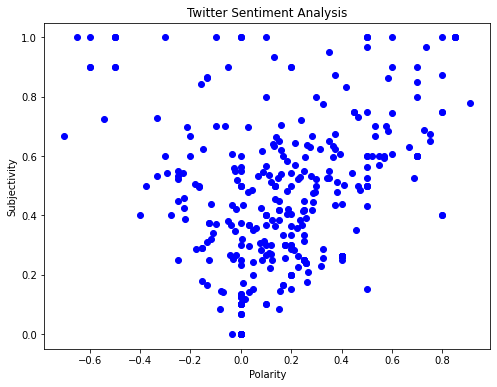

In [14]:
import matplotlib.pyplot as plt
# Plotting a graph with Subjectivity against Polarity
plt.figure(figsize=(8,6))

for i in range(1, tweets_df.shape[0]):
  plt.scatter(tweets_df["Polarity"][i], tweets_df["Subjectivity"][i], color='Blue')
  
# Labelling axis's and title
plt.title('Twitter Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

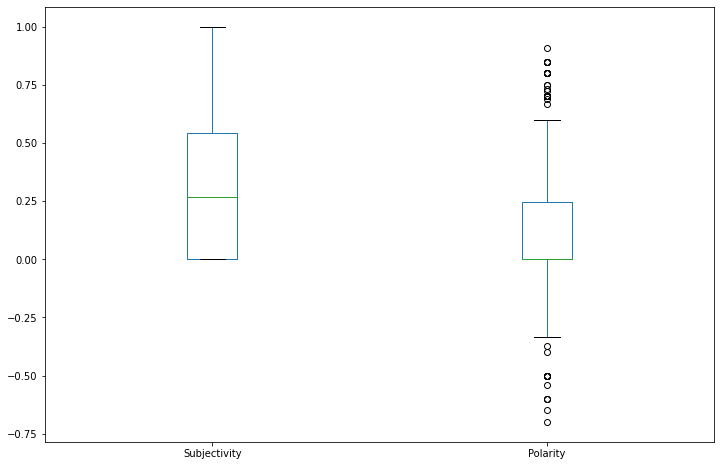

In [15]:
# Do a box plot of columns Subjectivity and Polarity
tweets_df.boxplot(column=['Subjectivity', 'Polarity'], grid=False, figsize=(12, 8))

# Sentiment over time.

From the documentation, the values of polarity can be interpreted as sentiment.  So we can *calculate* the sentiment of each tweet as either positive, negative or neutral.

> There are more precise ways, keeping it simple for this exercise.

It could be interesting to plot these over time.  So, each day there is a number of tweets, what proportions are positive, negative or neutral.

First let us add a sentiment column


In [32]:
# Deciding whether the tweet is positive, neutral or negative
def sentiment(polarity):
  if polarity > 0:
      return 'Positive'
  elif polarity == 0:
      return 'Neutral'
  else:
      return 'Negative'

In [33]:
tweets_df.head()

,Date,Clean Text,Subjectivity,Polarity,Sentiment
0,2022-01-30,I dont think he would take it yet but Jim Curtin,0.000000,0.000000,Neutral
1,2022-01-30,If they were to fire Gregg my pick would be Cu...,0.443750,0.287500,Positive
2,2022-01-30,Meanwell curtin You did tweet the work on the ...,0.000000,0.000000,Neutral
3,2022-01-30,mi What are you talking about McConnell s fear...,0.900000,-0.600000,Negative
4,2022-01-30,A recent BSRG survey of migrants from South As...,0.320833,0.004167,Positive


In [34]:
# Add sentiment column
tweets_df['Sentiment'] = tweets_df['Polarity'].apply(sentiment)

In [35]:
# Lets get just the positive tweets
pos = tweets_df[tweets_df['Sentiment'] == 'Positive']
pos

,Date,Clean Text,Subjectivity,Polarity,Sentiment
1,2022-01-30,If they were to fire Gregg my pick would be Cu...,0.443750,0.287500,Positive
4,2022-01-30,A recent BSRG survey of migrants from South As...,0.320833,0.004167,Positive
6,2022-01-30,curtin tbf I rarely tweet at all so I don t th...,0.450000,0.150000,Positive
7,2022-01-30,Excellent article Wouldn t it be a wonderful a...,0.637037,0.261111,Positive
9,2022-01-30,Live look at Jackson Mahomes,0.500000,0.136364,Positive
...,...,...,...,...,...
490,2022-01-28,The Witty Anxiety of Raquel Curtin,1.000000,0.500000,Positive
491,2022-01-28,91 of abortions are performed around 10 13 wee...,0.362500,0.137500,Positive
492,2022-01-28,Well Done Curtin University W A Amazing,0.900000,0.600000,Positive
493,2022-01-28,I don t have free will but I am responsible Yo...,0.583333,0.183333,Positive


### Write a function to calculate how many each day.  We will write a function because want to do this for negative and netural tweets.

In [36]:
def num_tweets(df):
    return df['Date'].value_counts().sort_index()


In [37]:
# positive tweets per day
pos_per_day = num_tweets(pos)
pos_per_day


2022-01-28    98
2022-01-29    74
2022-01-30    55
Name: Date, dtype: int64

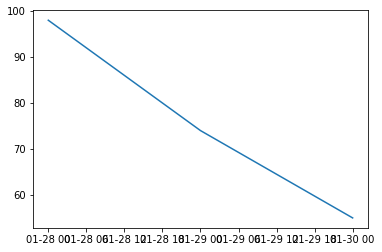

In [38]:
# Plot the positive tweets per day
pos_per_day.plot()

In [40]:
# Now repeat for negative
# Lets get just the positive tweets
neg = tweets_df[tweets_df['Sentiment'] == 'Negative']
neg

,Date,Clean Text,Subjectivity,Polarity,Sentiment
3,2022-01-30,mi What are you talking about McConnell s fear...,0.900000,-0.600000,Negative
14,2022-01-30,ngl man the way they were overloading us on th...,0.400000,-0.400000,Negative
30,2022-01-30,Let s hear it for our SENIORS Sunday will be t...,0.369231,-0.100000,Negative
32,2022-01-30,Archie bunker Ottolini and jane curtin behind ...,0.433333,-0.033333,Negative
42,2022-01-30,It s shocking to see the sweethearted local in...,0.666667,-0.200000,Negative
...,...,...,...,...,...
467,2022-01-28,Team Morrison will have a hard time demonizing...,0.541667,-0.291667,Negative
482,2022-01-28,Lang was a crook which is why he got the boot ...,0.625000,-0.150000,Negative
486,2022-01-28,So we were standing there before the WOD show ...,0.558929,-0.028571,Negative
489,2022-01-28,Am I the only one concerned about the emerging...,1.000000,-0.300000,Negative


In [41]:
# negative tweets per day
neg_per_day = num_tweets(neg)
neg_per_day

2022-01-28    33
2022-01-29    21
2022-01-30    18
Name: Date, dtype: int64

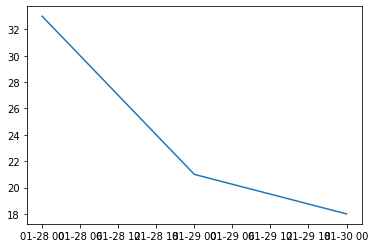

In [42]:
# Plot the negative tweets per day
neg_per_day.plot()


In [43]:
# repeat for neutral
# Lets get just the neutral tweets
neu = tweets_df[tweets_df['Sentiment'] == 'Neutral']
neu

,Date,Clean Text,Subjectivity,Polarity,Sentiment
0,2022-01-30,I dont think he would take it yet but Jim Curtin,0.0,0.0,Neutral
2,2022-01-30,Meanwell curtin You did tweet the work on the ...,0.0,0.0,Neutral
5,2022-01-30,Rooting for DGD Mathew Stafford tonight DawgsI...,0.0,0.0,Neutral
8,2022-01-30,escrota do caraio,0.0,0.0,Neutral
10,2022-01-30,When did Dan Aykroyd amp Jane Curtin pass,0.0,0.0,Neutral
...,...,...,...,...,...
487,2022-01-28,curtin Abortion is homicide It s just got a di...,0.6,0.0,Neutral
494,2022-01-28,Lori and Jim Curtin sighting at war on drugs s...,0.0,0.0,Neutral
495,2022-01-28,ter um cabelo curtin eu fico tchola,0.0,0.0,Neutral
496,2022-01-28,Am I the only one who immediately hears Hoyt C...,1.0,0.0,Neutral


In [44]:
# neutral tweets per day
neu_per_day = num_tweets(neu)
neu_per_day

2022-01-28    73
2022-01-29    71
2022-01-30    57
Name: Date, dtype: int64

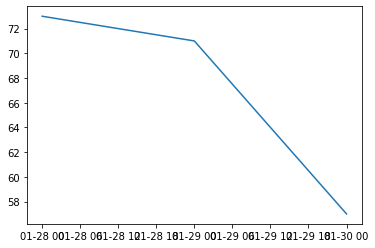

In [45]:
# Plot the neutral tweets per day
neu_per_day.plot()


### Next, we will display the number of positive, negative, or neutral tweets we have and also produce a percentage of each.


In [48]:
tweets_df.shape[0]

500

In [55]:
# count the unique rows in the dataframe - returns the total number of rows
tweets_df['Sentiment'].value_counts()

Positive    227
Neutral     201
Negative     72
Name: Sentiment, dtype: int64

In [51]:
# Finding percentage of positive tweets
postweets = tweets_df[tweets_df.Sentiment == 'Positive']
postweets = postweets['Clean Text']

#print(postweets)
#print(postweets.shape)
#print(tweets_df.shape)

pos_percentage = round((postweets.shape[0]/tweets_df.shape[0]) * 100, 1)
pos_percentage

45.4

In [52]:
# Finding percentage of negative tweets
postweets = tweets_df[tweets_df.Sentiment == 'Positive']
postweets = postweets['Clean Text']

#print(postweets)
#print(postweets.shape)
#print(tweets_df.shape)

pos_percentage = round((postweets.shape[0]/tweets_df.shape[0]) * 100, 1)
pos_percentage

14.4

In [53]:
# Finding percentage of neutral tweets
neutweets = tweets_df[tweets_df.Sentiment == 'Neutral']
neutweets = neutweets['Clean Text']

#print(neutweets)
#print(neutweets.shape)
#print(tweets_df.shape)

neu_percentage = round((neutweets.shape[0]/tweets_df.shape[0]) * 100, 1)
neu_percentage

40.2

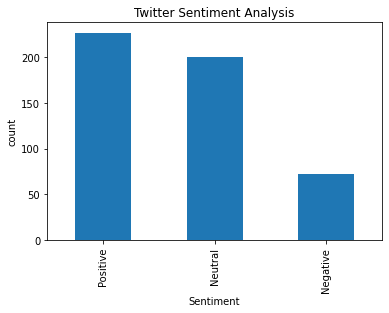

In [54]:
# Creating a bar chart to visualise the count
plt.title('Twitter Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('count')
tweets_df['Sentiment'].value_counts().plot(kind='bar')
plt.show()

How about propotions of sentiment type?

Visit Python Graph Gallery, 'Part of the Whole', select 'Pie' and loot at the example

([<matplotlib.patches.Wedge at 0x7f885c2df2d0>,
 [Text(0.1584118738527104, 1.0885337285644727, ''),
  Text(-1.0853545464006118, -0.17890083456351516, ''),
  Text(0.333338763618726, -1.048277286155309, '')])

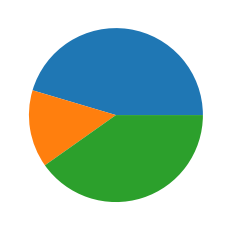

In [56]:
import matplotlib.pyplot as plt
values = [len(pos),len(neg),len(neu)]
plt.pie(values)

We can do better. 

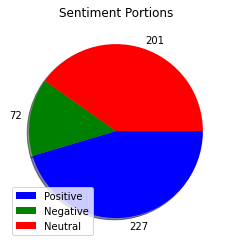

In [57]:
import matplotlib.pyplot as plt
 
values = [len(pos),len(neg),len(neu)]
labels = ['Positive', 'Negative', 'Neutral']
colors = ['b', 'g', 'r']
plt.pie(values, colors=colors, labels= values,counterclock=False, shadow=True)
plt.title('Sentiment Portions')
plt.legend(labels,loc=3)
plt.show()

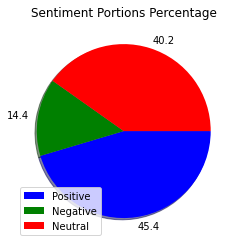

In [58]:
import matplotlib.pyplot as plt
 
values = [pos_percentage,neg_percentage,neu_percentage]
labels = ['Positive', 'Negative', 'Neutral']
colors = ['b', 'g', 'r']
plt.pie(values, colors=colors, labels= values,counterclock=False, shadow=True)
plt.title('Sentiment Portions Percentage')
plt.legend(labels,loc=3)
plt.show()

#3 WordCLoud

Visit Python Graph Gallery, 'Ranking', select 'Word Cloud' and look at the example

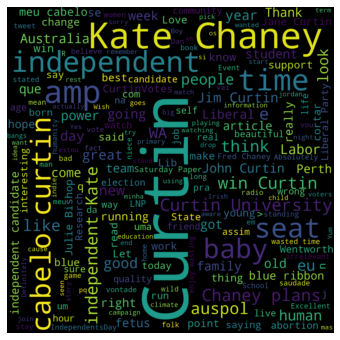

In [59]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from stopwords import ENGLISH_STOP_WORDS

# Get all the messages
# Stores all the words in one string
messages = ' '.join(tweets_df['Clean Text'])

# Create the wordcloud object
wordcloud = WordCloud(width=1480, height=1480, margin=0, stopwords=ENGLISH_STOP_WORDS, ).generate(messages)

# Display the generated image:
plt.figure(figsize = (6,6), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()